**Credits to Code Institute:** All code below is either; 
re-modeled, re-structed or re-created to fit this project.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [4]:
cwd= os.getcwd()

In [5]:
os.chdir('/workspace/mildewdetectionincherryleaves')
print("You have set a new current directory to the project.")

You have set a new current directory to the project.


In [6]:
work_dir = os.getcwd()
work_dir

'/workspace/mildewdetectionincherryleaves'

In [7]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

In [8]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('There is an old version availiable, create a new version.')
    pass
else:
    os.makedirs(name=file_path)

There is an old version availiable, create a new version.


In [9]:
labels = os.listdir(train_path)
print('Labels for the images in the training dataset are.', labels)

Labels for the images in the training dataset are. ['healthy', 'powdery_mildew']


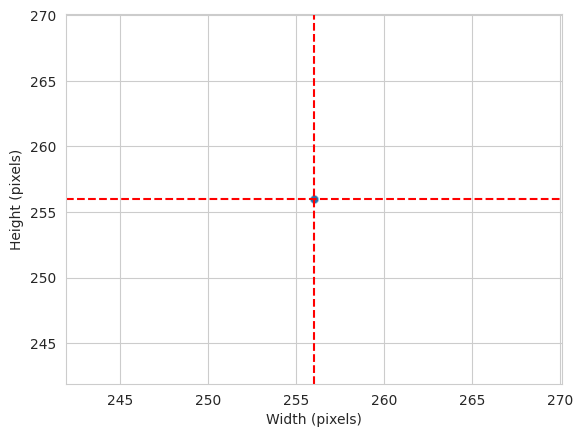

Width average: 256 
Height average: 256


In [12]:
from PIL import Image
def get_image_dimensions(image_path):

  img = Image.open(image_path)
  return img.width, img.height, img.getbands()


def analyze_image_dimensions(train_path, labels):
  dim1, dim2 = [], []
  for label in labels:
    label_path = os.path.join(train_path, label)
    for image_filename in os.listdir(label_path):
      image_path = os.path.join(label_path, image_filename)
      width, height, _ = get_image_dimensions(image_path)
      dim1.append(height)
      dim2.append(width)
  return dim1, dim2


def visualize_and_summarize_dimensions(dim1, dim2):
  sns.set_style("whitegrid")
  fig, axes = plt.subplots()
  sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
  axes.set_xlabel("Width (pixels)")
  axes.set_ylabel("Height (pixels)")
  dim1_mean = int(np.array(dim1).mean())
  dim2_mean = int(np.array(dim2).mean())
  axes.axvline(x=dim1_mean, color='r', linestyle='--')
  axes.axhline(y=dim2_mean, color='r', linestyle='--')
  plt.show()
  print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

dim1, dim2 = analyze_image_dimensions(train_path, labels)
visualize_and_summarize_dimensions(dim1, dim2)

In [11]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

NameError: name 'dim1_mean' is not defined

In [37]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

In [1]:
from tensorflow.keras.preprocessing import image


def load_images_from_directory(data_dir, target_size=(50, 50), max_images_per_label=20):

  X, y = [], []
  for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    image_paths = [os.path.join(label_path, filename) for filename in os.listdir(label_path)]

    image_paths = image_paths[:max_images_per_label]

    for image_path in image_paths:
      img = image.load_img(image_path, target_size=target_size)
      img_array = image.img_to_array(img)

      if img_array.max() > 1:
        img_array = img_array / 255.0

      X.append(img_array)
      y.append(label)

  X = np.array(X)
  y = np.array(y)

  return X, y

2024-06-26 19:39:33.387154: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 19:39:33.391864: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-26 19:39:33.438486: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 19:39:34.620020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X, y = load_images_from_directory(
    data_dir=train_path,
    target_size=image_shape,
    max_images_per_label=30
)

print(X.shape, y.shape)

NameError: name 'train_path' is not defined

In [44]:
def plot_mean_and_variability(X, y, figsize=(12, 5), save_path=None):

  unique_labels = np.unique(y)
  for label in unique_labels:
    mask = y == label
    label_data = X[mask]

    avg_img = np.mean(label_data, axis=0)
    std_img = np.std(label_data, axis=0)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Leaf Image (Label: {label})")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Standard Deviation (Label: {label})")
    axes[1].imshow(std_img, cmap='gray')

    if save_path:
      plt.savefig(f"{save_path}/avg_var_{label}.png", bbox_inches='tight', dpi=150)
    else:
      plt.tight_layout()
      plt.show()

    print(f"Image Shape (Label: {label}): {avg_img.shape}")

  print("\nAll plots generated!")

==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


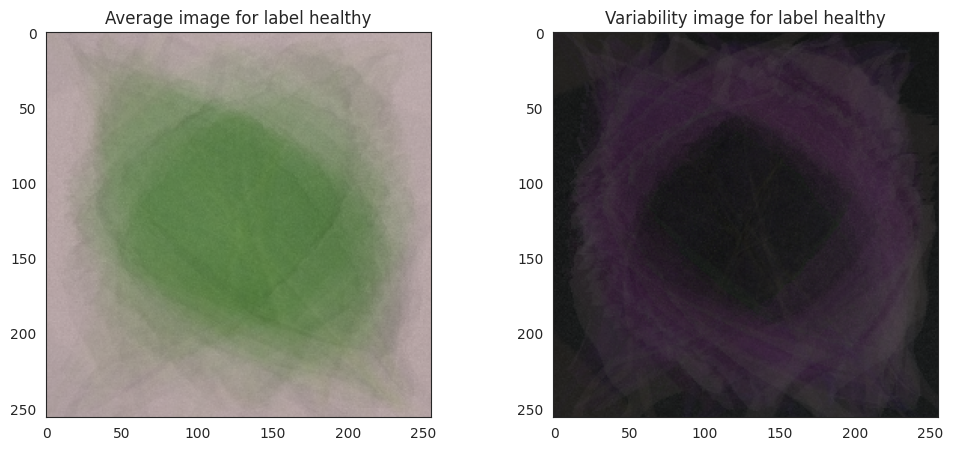

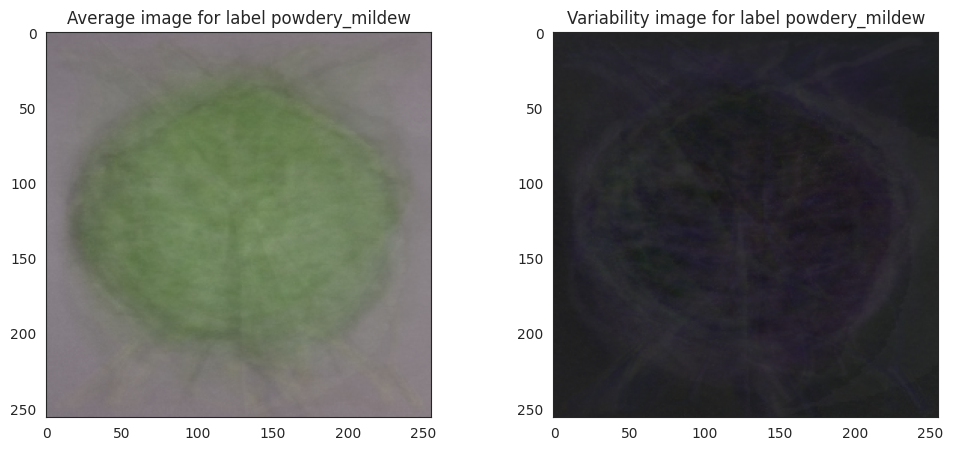

In [43]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

In [47]:
def calculate_label_average(X, y, label):
 
  mask = y == label
  label_data = X[mask]
  return np.mean(label_data, axis=0)


def compare_label_averages(X, y, label1, label2, figsize=(20, 5), save_path=None):

  unique_labels = np.unique(y)
  if label1 not in unique_labels or label2 not in unique_labels:
    print(f"Labels {label1} or {label2} not found in unique labels: {unique_labels}")
    return

  label1_avg = calculate_label_average(X, y, label1)
  label2_avg = calculate_label_average(X, y, label2)

  difference_mean = label1_avg - label2_avg

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(label1_avg, cmap='gray')
  axes[0].set_title(f'Average {label1}')
  axes[1].imshow(label2_avg, cmap='gray')
  axes[1].set_title(f'Average {label2}')
  axes[2].imshow(difference_mean, cmap='gray')
  axes[2].set_title(f'Difference: Avg {label1} & {label2}')

  if save_path:
    plt.savefig(f"{save_path}/diff_avg_{label1}_{label2}.png", bbox_inches='tight', dpi=150)
  else:
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3253595..0.18718955].


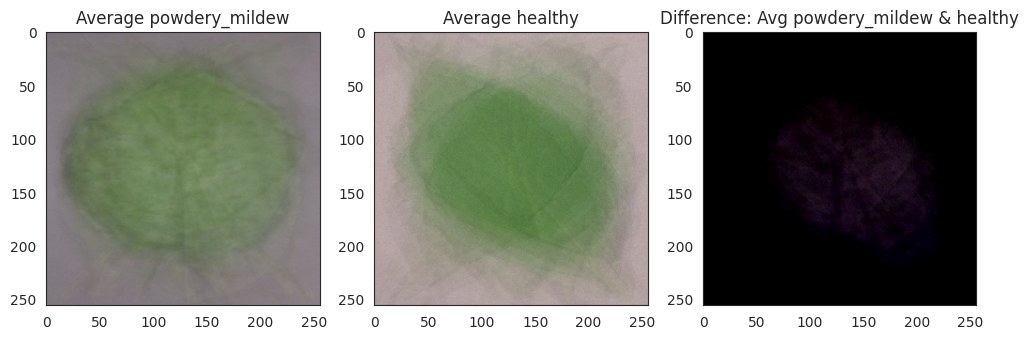

In [48]:
compare_label_averages(X=X, y=y, label1='powdery_mildew', label2='healthy', figsize=(12, 10), save_path=file_path)


In [52]:
import itertools
import random
sns.set_style("white")


import os
import random
from matplotlib import pyplot as plt
import itertools


def create_image_montage(image_dir, label, num_rows, num_cols, figsize=(15, 10)):

  label_path = os.path.join(image_dir, label)

  if not os.path.isdir(label_path):
    print(f"Label directory '{label}' does not exist in '{image_dir}'.")
    return

  image_list = os.listdir(label_path)
  if num_rows * num_cols > len(image_list):
    print(f"Requested montage size ({num_rows}x{num_cols}) exceeds available images ({len(image_list)}).")
    print("Reducing montage size or selecting a subset of images is recommended.")
    return

  image_subset = random.sample(image_list, num_rows * num_cols) if num_rows * num_cols < len(image_list) else image_list

  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)

  list_rows, list_cols = range(num_rows), range(num_cols)
  plot_idx = list(itertools.product(list_rows, list_cols))
  for i, image_filename in enumerate(image_subset):
    image_path = os.path.join(label_path, image_filename)
    img = plt.imread(image_path)
    img_shape = img.shape

    axes[plot_idx[i][0], plot_idx[i][1]].imshow(img)
    axes[plot_idx[i][0], plot_idx[i][1]].set_title(f"{img_shape[1]}px x {img_shape[0]}px")
    axes[plot_idx[i][0], plot_idx[i][1]].set_xticks([])
    axes[plot_idx[i][0], plot_idx[i][1]].set_yticks([])

  plt.tight_layout()
  plt.show()

healthy


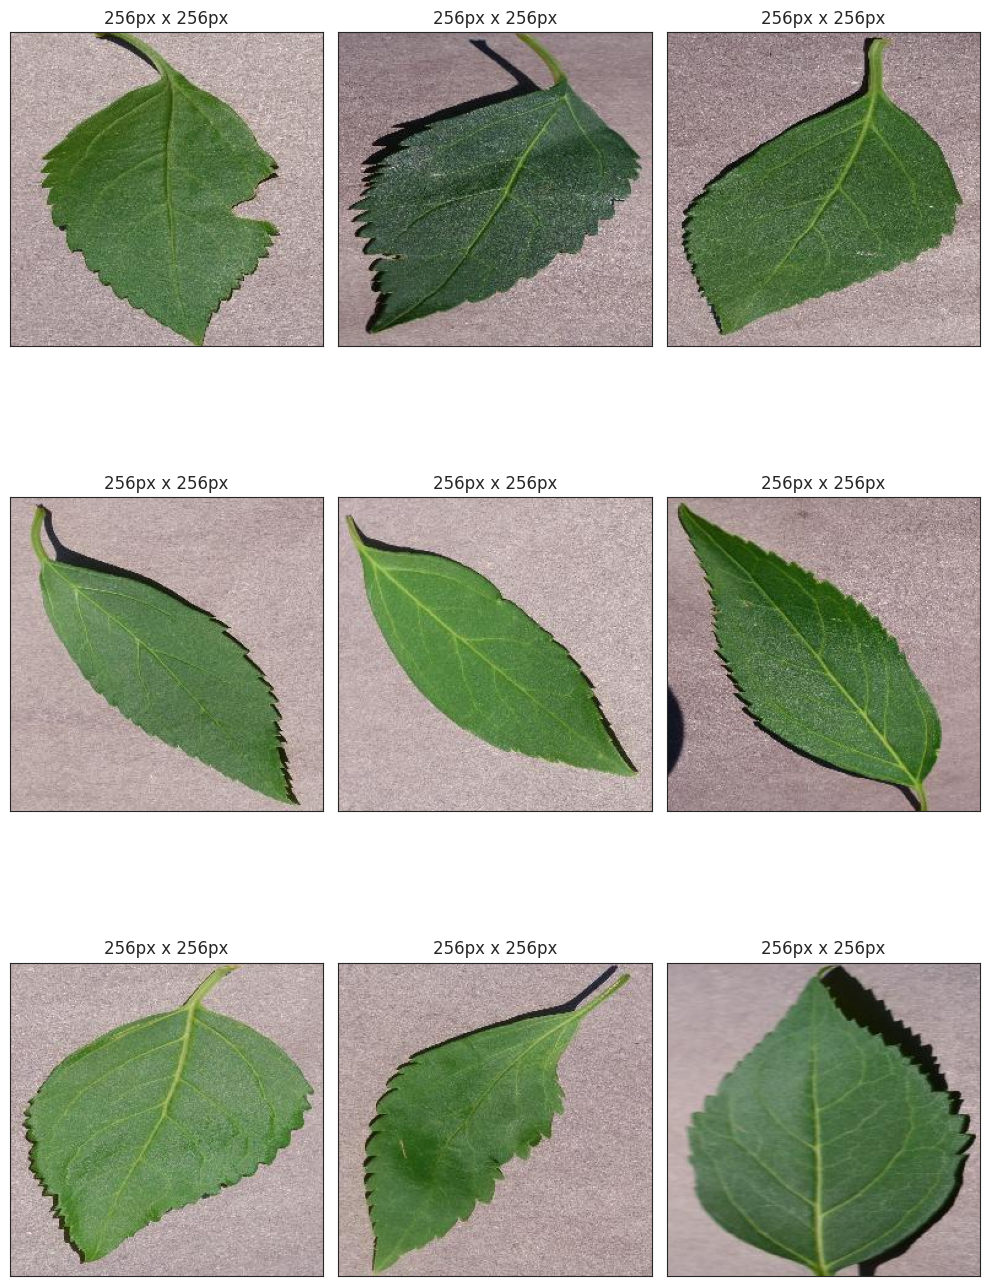



powdery_mildew


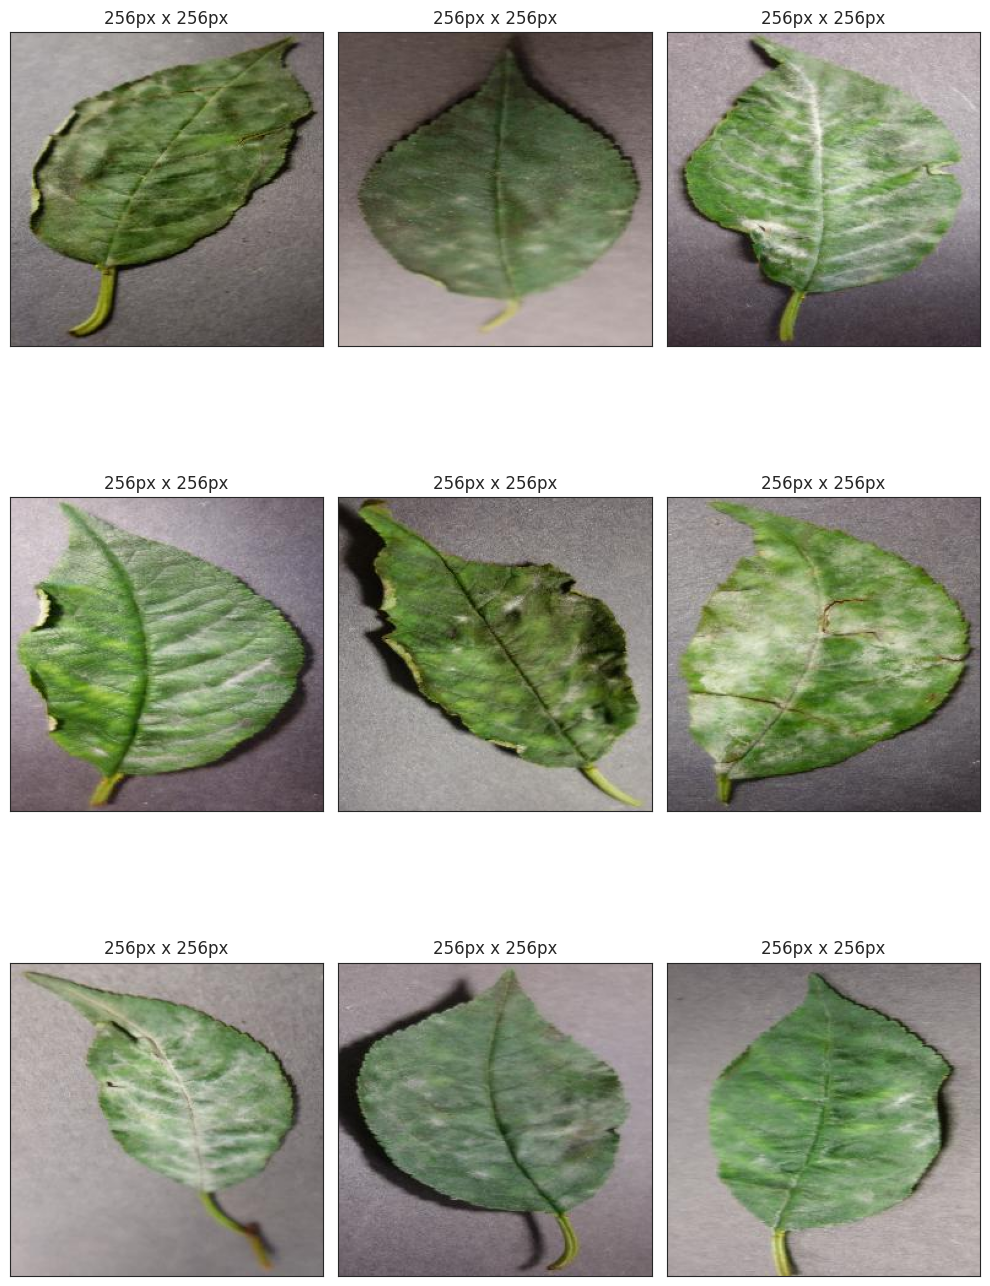

In [53]:
for label in labels:
  print(label)
  create_image_montage(image_dir=train_path, label=label, num_rows=3, num_cols=3, figsize=(10, 15))
  print("\n")


### End of Step By Step Instructions for Data Visualization - Well Done!